In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
f = lambda x: np.sin(x) * np.sqrt(x) + 1
h = np.pi / 7
n = 7
x = (0, 0.5 * h, 1.5 * h, 2.5 * h, 4.5 * h, 6.5 * h, np.pi)

y = list(map(f, x))
h = [0] + [x[i] - x[i - 1] for i in range(1, n)]

''' 

We will look for values in the second derivative (notation in the code "m") of our splines 
using a tridiagonal matrix. Distillation method.

a[i], b[i], c[i] - coefficients in the i - row of the tridiagonal matrix. d[i] - value in i - row.

'''
a = [0] + [h[i] / 6 for i in range(1, n - 1)] + [0]
b = [1] + [(h[i] + h[i + 1]) / 3 for i in range(1, n - 1)] + [1]
c = [0] + [h[i] / 6 for i in range(2, n)] + [0]
d = [0] + [(y[i] - y[i - 1])/h[i] - (y[i - 1] - y[i - 2])/h[i - 1] for i in range(2, n)] + [0]

# ksi[i + 1], etta[i + 1] - coefficients for finding the second derivative of the i-th spline.

ksi = [0]
etta = [0]
for i in range(n):
    ksi.append(c[i]/(-b[i] - ksi[i] * a[i]))
    etta.append((a[i] * etta[i] - d[i])/(-b[i] - ksi[i] * a[i]))
    
m = [0] * n
for i in range(n - 2, 0, - 1):
    m[i] = ksi[i + 1] * m[i + 1] + etta[i + 1]

In [15]:
coords_x = [i/639 * np.pi for i in range(1, 640)]
coords_y = []
i = 1
for coord_x in coords_x:
    while not x[i - 1] <= coord_x <= x[i]:
        i += 1
    coord_y = m[i - 1] / (6 * h[i]) * (x[i] - coord_x) ** 3 + m[i] / (6 * h[i]) * (coord_x - x[i - 1]) ** 3 + (y[i - 1] - m[i - 1] * h[i] ** 2 / 6) * (x[i] - coord_x) / h[i] + (y[i] - m[i] * h[i] ** 2 / 6) * (coord_x - x[i - 1]) / h[i] 
    coords_y.append(coord_y)

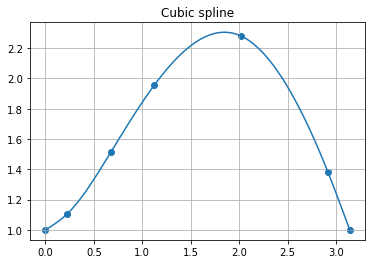

In [16]:
fig, ax = plt.subplots()
ax.grid()
ax.plot(coords_x, coords_y)
ax.scatter(x, list(map(f, x)))
ax.set_title("Cubic spline")
plt.show()

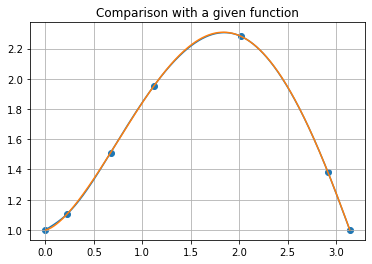

In [17]:
# Almost completely coincides with the given function

plt.plot(coords_x, coords_y)
plt.plot(coords_x, list(map(f, coords_x)))
plt.grid()
plt.scatter(x, list(map(f, x)))
plt.title("Comparison with a given function")
plt.show()